In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('covid_19_data.csv')


In [3]:
# Display the first few rows of the dataset
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
# Get summary statistics
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:

# Check for missing values
data.isnull().sum()


Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [13]:
# Fill missing values in Province/State with 'Unknown'
data['Province/State'].fillna('Unknown', inplace=True)

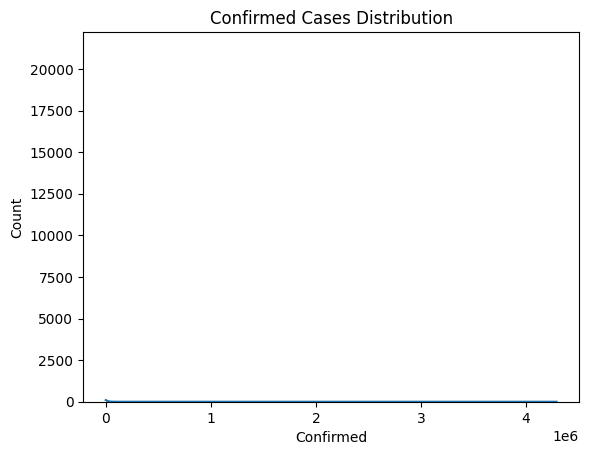

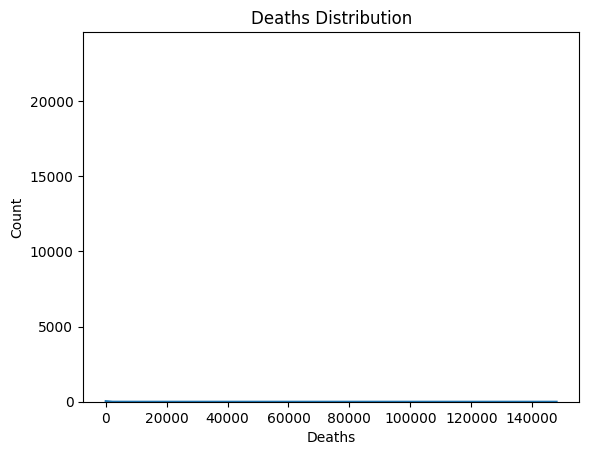

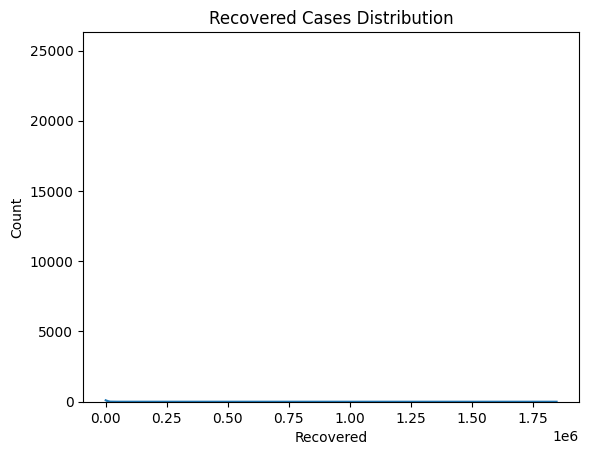

In [15]:
# Plot the distribution of confirmed cases, deaths, and recoveries
sns.histplot(data['Confirmed'], kde=True)
plt.title('Confirmed Cases Distribution')
plt.show()

sns.histplot(data['Deaths'], kde=True)
plt.title('Deaths Distribution')
plt.show()

sns.histplot(data['Recovered'], kde=True)
plt.title('Recovered Cases Distribution')
plt.show()


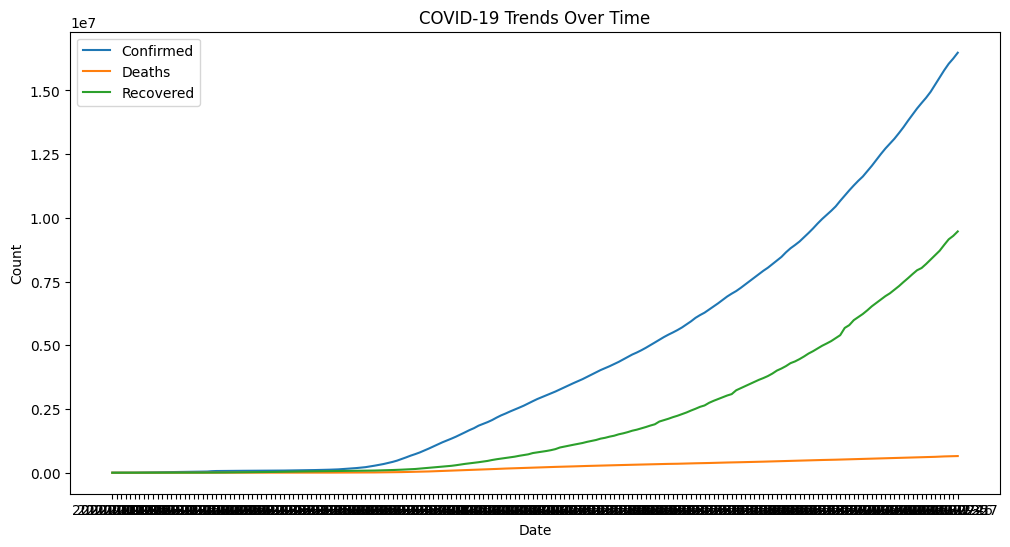

In [17]:
# Group data by date and sum the values
daily_data = data.groupby('Date').sum().reset_index()

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Confirmed'], label='Confirmed')
plt.plot(daily_data['Date'], daily_data['Deaths'], label='Deaths')
plt.plot(daily_data['Date'], daily_data['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Trends Over Time')
plt.legend()
plt.show()


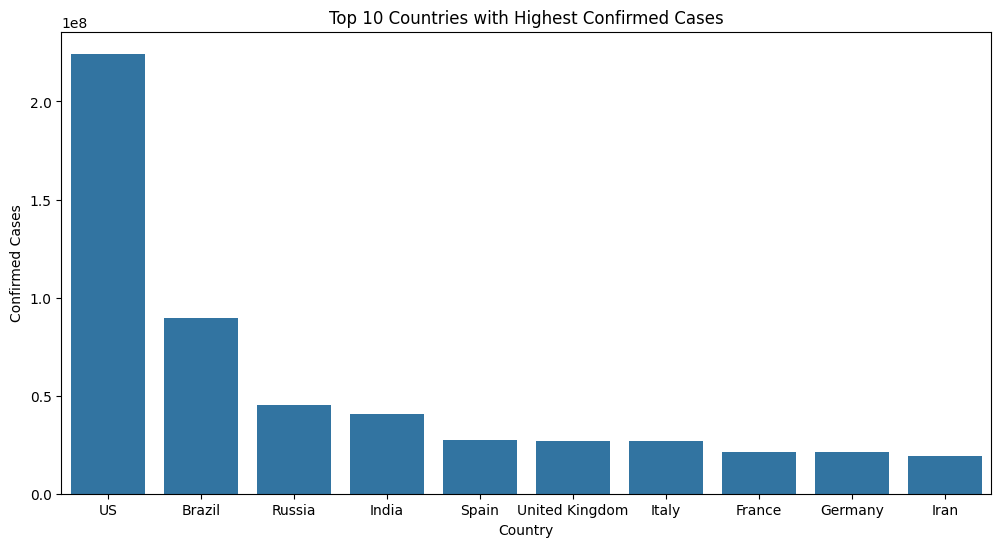

In [19]:
# Group data by country and sum the values
country_data = data.groupby('Country/Region').sum().reset_index()

# Plot top 10 countries with the highest confirmed cases
top_10_countries = country_data.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='Confirmed', data=top_10_countries)
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.show()
